In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader
from torchvision import transforms
import os
from tqdm import tqdm

class SingleLayerNN(nn.Module):
    def __init__(self):
        super(SingleLayerNN, self).__init__()
        self.fc = nn.Linear(784, 256)  
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 128)
        self.fc5 = nn.Linear(128, 256)
        self.out = nn.Linear(256, 784)

    def forward(self, x):
        x = torch.relu(self.fc(x)) 
        x = torch.relu(self.fc2(x)) 
        x = torch.relu(self.fc3(x)) 
        x = torch.relu(self.fc4(x)) 
        x = torch.relu(self.fc5(x)) 
        x = self.out(x)  
        return x

model = SingleLayerNN()


criterion = nn.MSELoss() 
optimizer = optim.Adam(model.parameters(), lr=0.01)  


In [53]:
train_dataset = MNIST(os.getcwd(), train=True, download=True, transform=[transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
x_train = train_dataset.data / 255.0
x_train = torch.tensor(x_train, dtype=torch.float32)
x_train = x_train.view(-1, 784)
trainloader = DataLoader(x_train, batch_size=64, shuffle=True)

C:\Users\ianey\AppData\Local\Temp\ipykernel_17996\2340656213.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype=torch.float32)


In [54]:
def neuronalNeuralBalance(inl, oul):

    ninc = torch.zeros_like(inl.weight)
    noul = torch.zeros_like(oul.weight)

    for i in range(inl.weight.data.shape[0]):
        inc = np.sqrt(torch.sum(torch.square(inl.weight.data[i])).item())
        outg = np.sqrt(torch.sum(torch.square(oul.weight.data[:,i])).item())

        # outg = outg / float(len(oul.weight.data[:,i]))
        # inc = inc / float(len(inl.weight.data[i]))

        opt = np.sqrt(outg/inc)

        ninc[i] = inl.weight.data[i]*opt
        noul[:, i] = oul.weight.data[:,i]/opt

    diff = (torch.sum(torch.abs(inl.weight.data - ninc)).item(), torch.sum(torch.abs(oul.weight.data-noul)).item())

    inl.weight.data = ninc
    oul.weight.data = noul

    return diff


In [55]:
model = model.to('cuda')
lay = []
for n, i in model.named_children():
    print(type(i).__name__)
    if type(i).__name__ == "Linear":
        lay.append((n, i))

num_epochs = 20  
for epoch in range(num_epochs):
    for b in tqdm(trainloader):
        b = b.to('cuda')
        optimizer.zero_grad() 
        outputs = model(b)  
        loss = criterion(outputs, b) 

        loss.backward() 
        optimizer.step() 
    
    
    for i in range(len(lay)):
        if i > 0 and i <= len(lay)-1:
            di = neuronalNeuralBalance(lay[i-1][1], lay[i][1])
            while(di[0]+di[1] > .001):
                di = neuronalNeuralBalance(lay[i-1][1], lay[i][1])

    print(f'Epoch {epoch}/{num_epochs}, Loss: {loss.item()}')


# for b in tqdm(trainloader):
#     with torch.no_grad():
#         b = b.to('cuda')
#         outputs = model(b)  


Linear
Linear


100%|██████████| 938/938 [00:01<00:00, 543.85it/s]


Epoch 0/20, Loss: 0.0363197848200798


100%|██████████| 938/938 [00:01<00:00, 631.69it/s]


Epoch 1/20, Loss: 0.038962796330451965


100%|██████████| 938/938 [00:01<00:00, 649.13it/s]


Epoch 2/20, Loss: 0.0348663330078125


100%|██████████| 938/938 [00:01<00:00, 656.64it/s]


Epoch 3/20, Loss: 0.040661342442035675


100%|██████████| 938/938 [00:01<00:00, 634.93it/s]


Epoch 4/20, Loss: 0.03568202257156372


100%|██████████| 938/938 [00:01<00:00, 611.80it/s]


Epoch 5/20, Loss: 0.036814913153648376


100%|██████████| 938/938 [00:01<00:00, 622.51it/s]


Epoch 6/20, Loss: 0.03550887480378151


100%|██████████| 938/938 [00:01<00:00, 621.65it/s]


Epoch 7/20, Loss: 0.03678247705101967


100%|██████████| 938/938 [00:01<00:00, 619.65it/s]


Epoch 8/20, Loss: 0.03384598717093468


100%|██████████| 938/938 [00:01<00:00, 664.77it/s]


Epoch 9/20, Loss: 0.036303188651800156


100%|██████████| 938/938 [00:01<00:00, 652.52it/s]


Epoch 10/20, Loss: 0.03539370745420456


100%|██████████| 938/938 [00:01<00:00, 662.73it/s]


Epoch 11/20, Loss: 0.03676972910761833


100%|██████████| 938/938 [00:01<00:00, 642.53it/s]


Epoch 12/20, Loss: 0.033522333949804306


100%|██████████| 938/938 [00:01<00:00, 646.30it/s]


Epoch 13/20, Loss: 0.0373448021709919


100%|██████████| 938/938 [00:01<00:00, 652.25it/s]


Epoch 14/20, Loss: 0.0368402823805809


100%|██████████| 938/938 [00:01<00:00, 650.52it/s]


Epoch 15/20, Loss: 0.034354034811258316


100%|██████████| 938/938 [00:01<00:00, 603.48it/s]


Epoch 16/20, Loss: 0.03541145846247673


100%|██████████| 938/938 [00:01<00:00, 661.54it/s]


Epoch 17/20, Loss: 0.03842978924512863


100%|██████████| 938/938 [00:01<00:00, 673.95it/s]


Epoch 18/20, Loss: 0.04129737615585327


100%|██████████| 938/938 [00:01<00:00, 664.26it/s]

Epoch 19/20, Loss: 0.03678270801901817


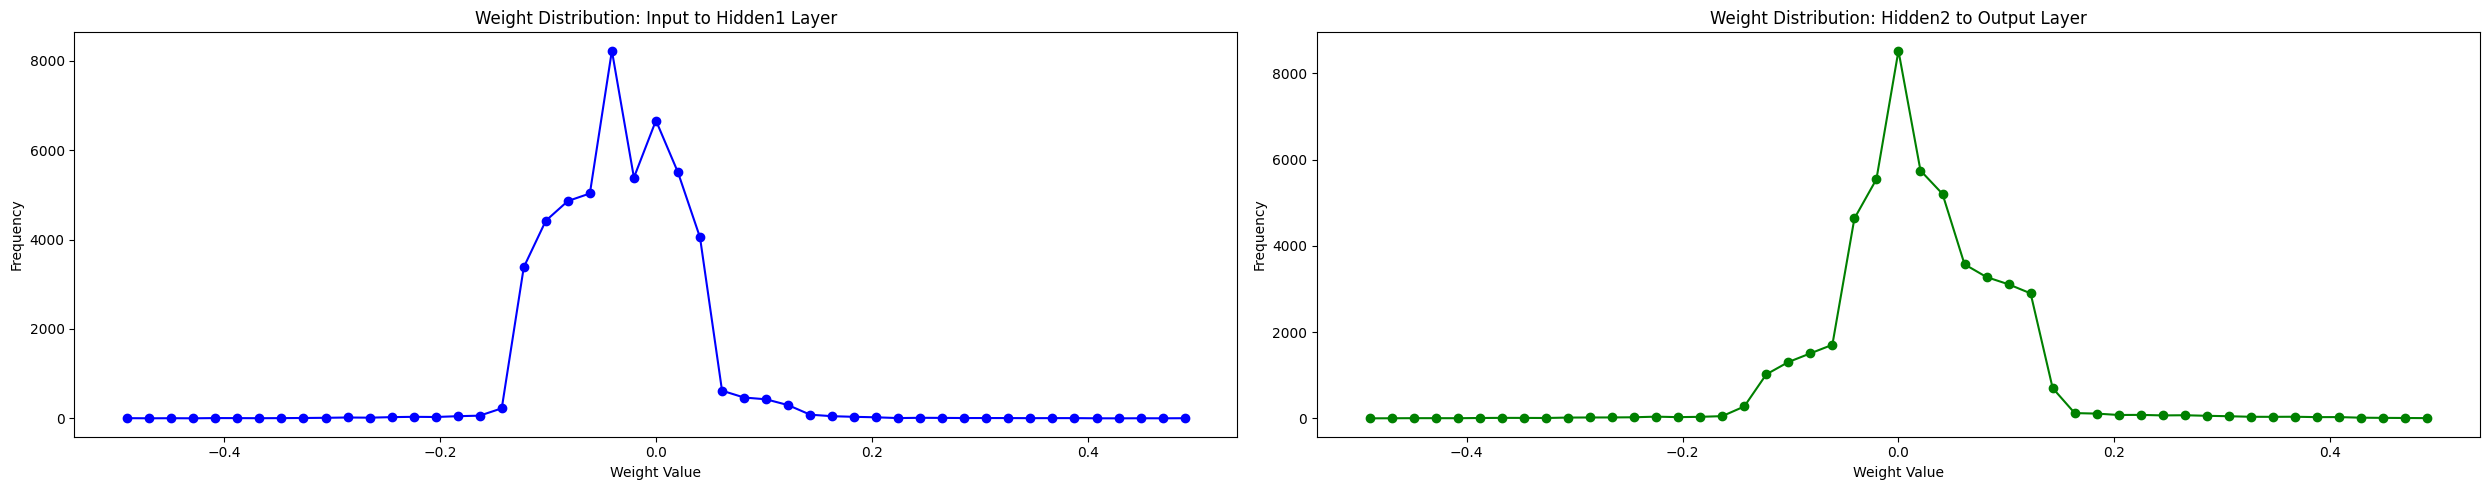

In [56]:
import matplotlib.pyplot as plt

fc_weights = model.fc.weight.cpu().detach().numpy().flatten()
out_weights = model.out.weight.cpu().detach().numpy().flatten()

bins = np.linspace(-0.5, 0.5, 50) 
fc_hist, fc_bins = np.histogram(fc_weights, bins=bins)
out_hist, out_bins = np.histogram(out_weights, bins=bins)

fc_bin_centers = 0.5 * (fc_bins[:-1] + fc_bins[1:])
out_bin_centers = 0.5 * (out_bins[:-1] + out_bins[1:])

plt.figure(figsize=(25, 5))

plt.subplot(1, 2, 1)
plt.plot(fc_bin_centers, fc_hist, marker='o', linestyle='-', color='b')
plt.title('Weight Distribution: Input to Hidden1 Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.plot(out_bin_centers, out_hist, marker='o', linestyle='-', color='g')
plt.title('Weight Distribution: Hidden2 to Output Layer')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [57]:
import torch

def count_nonzero_weights_above_threshold(layer, threshold=0.1):
    return torch.sum(torch.abs(layer.weight) > threshold).item()

threshold_value = 0.01 

nonzero_fc1 = count_nonzero_weights_above_threshold(model.fc, threshold=threshold_value)
nonzero_fc3 = count_nonzero_weights_above_threshold(model.out, threshold=threshold_value)

print(f'Number of non-zero weights greater than {threshold_value} in layer 1: {nonzero_fc1}')
print(f'Number of non-zero weights greater than {threshold_value} in layer 3: {nonzero_fc3}')

Number of non-zero weights greater than 0.01 in layer 1: 43643
Number of non-zero weights greater than 0.01 in layer 3: 41768


In [59]:
for i in range(len(lay)):
    if i > 0 and i <= len(lay)-1:
        norms = []
        for j in range(lay[i-1][1].weight.shape[0]):
            norms.append(np.sqrt(torch.sum(torch.square(lay[i][1].weight.data[:,j])).item())/np.sqrt(torch.sum(torch.square(lay[i-1][1].weight.data[j])).item()))
        print(norms)
        norms = torch.tensor(norms)
        print(norms.shape)

[1.0, 1.0, 1.0, 1.0000000347491498, 0.9999999665102736, 1.000000098429894, 1.000000065913797, 1.0, 1.0000000949369596, 1.0, 1.000000070383257, 1.0000001087067059, 1.0, 1.0000001004383816, 1.0000000377931828, 1.0000000352672922, 1.0000000464310486, 1.0000000513655678, 1.0, 1.0, 1.0, 1.0000000692026652, 1.0000000353985077, 1.0000000332499905, 1.0000000681554242, 1.0000000330244092, 1.0000000723342766, 1.0000000672228213, 1.0000000527920598, 1.0, 1.000000066966007, 1.0000001028515402, 1.0000000338428436, 1.0000000689526516, 1.000000066150374, 1.0, 1.000000067553671, 1.0000001017869737, 1.0000000684387396, 0.9999999652543312, 1.0, 0.9999999662621265, 0.9999999565527709, 1.0, 0.999999959752681, 0.9999999635343759, 1.0000000708528891, 0.9999999660604193, 1.0000000977519863, 1.0, 1.0000001796942126, 1.0, 1.0000000711196455, 1.0000000414617687, 0.9999999646218241, 1.0000000346731184, 1.0000000678598027, 1.00000008693226, 1.0000001173002389, 1.0, 0.9999999651560556, 0.9999998516062034, 1.000000